We want to create a boxplot of the times emails where sent, so that it can be seen when the most emails where sent (since there will be quite a few outliers, but really interesting for the working hours are only the times when many emails where sent)

In [2]:
%run ../src/parse_mails.py

df = parse_maildir("../data/maildir")
df

,name,date,parsed_date,time,day,tz
../data/maildir/tycholiz-b/sent_items/155.,tycholiz-b,"Date: Fri, 12 Oct 2001 10:57:02 -0700 (PDT)\n",2001-10-12 10:57:02-07:00,10:57:02,2001-10-12,PDT
../data/maildir/tycholiz-b/sent_items/113.,tycholiz-b,"Date: Fri, 28 Sep 2001 09:36:02 -0700 (PDT)\n",2001-09-28 09:36:02-07:00,09:36:02,2001-09-28,PDT
../data/maildir/tycholiz-b/sent_items/408.,tycholiz-b,"Date: Tue, 6 Nov 2001 07:13:09 -0800 (PST)\n",2001-11-06 07:13:09-08:00,07:13:09,2001-11-06,PST
../data/maildir/tycholiz-b/sent_items/247.,tycholiz-b,"Date: Fri, 30 Nov 2001 07:57:29 -0800 (PST)\n",2001-11-30 07:57:29-08:00,07:57:29,2001-11-30,PST
../data/maildir/tycholiz-b/sent_items/216.,tycholiz-b,"Date: Fri, 26 Oct 2001 10:49:36 -0700 (PDT)\n",2001-10-26 10:49:36-07:00,10:49:36,2001-10-26,PDT
...,...,...,...,...,...,...
../data/maildir/dickson-s/sent/85.,dickson-s,"Date: Wed, 11 Apr 2001 04:29:00 -0700 (PDT)\n",2001-04-11 04:29:00-07:00,04:29:00,2001-04-11,PDT
../data/maildir/dickson-s/sent/3.,dickson-s,"Date: Fri, 9 Mar 2001 01:50:00 -0800 (PST)\n",2001-03-09 01:50:00-08:00,01:50:00,2001-03-09,PST
../data/maildir/dickson-s/sent/81.,dickson-s,"Date: Wed, 11 Apr 2001 02:29:00 -0700 (PDT)\n",2001-04-11 02:29:00-07:00,02:29:00,2001-04-11,PDT
../data/maildir/dickson-s/sent/38.,dickson-s,"Date: Wed, 28 Mar 2001 03:57:00 -0800 (PST)\n",2001-03-28 03:57:00-08:00,03:57:00,2001-03-28,PST


In [17]:
df["seconds_since_midnight"] = df["time"].apply(lambda x: x.hour * 60 * 60 + x.minute * 60 + x.second)
grouped_times = df.groupby("name")["seconds_since_midnight"].apply(list).reset_index()
times = grouped_times["seconds_since_midnight"].to_numpy()
names = grouped_times["name"].to_numpy()
names

array(['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e',
       'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s',
       'buy-r', 'campbell-l', 'carson-m', 'cash-m', 'causholli-m',
       'corman-s', 'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d',
       'dean-c', 'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l',
       'donohoe-t', 'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m',
       'forney-j', 'fossum-d', 'gang-l', 'gay-r', 'geaccone-t',
       'germany-c', 'gilbertsmith-d', 'giron-d', 'griffith-j',
       'grigsby-m', 'guzman-m', 'haedicke-m', 'hain-m', 'hayslett-r',
       'heard-m', 'hendrickson-s', 'hernandez-j', 'hodge-j', 'holst-k',
       'horton-s', 'hyatt-k', 'hyvl-d', 'jones-t', 'kaminski-v', 'kean-s',
       'keavey-p', 'keiser-k', 'king-j', 'kitchen-l', 'kuykendall-t',
       'lavorato-j', 'lay-k', 'lenhart-m', 'lewis-a', 'linder-e',
       'lokay-m', 'lokey-t', 'love-p', 'lucci-p', 'maggi-m', 'mann-k',
       'martin-t', 'may-l', 'mcc

In [35]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

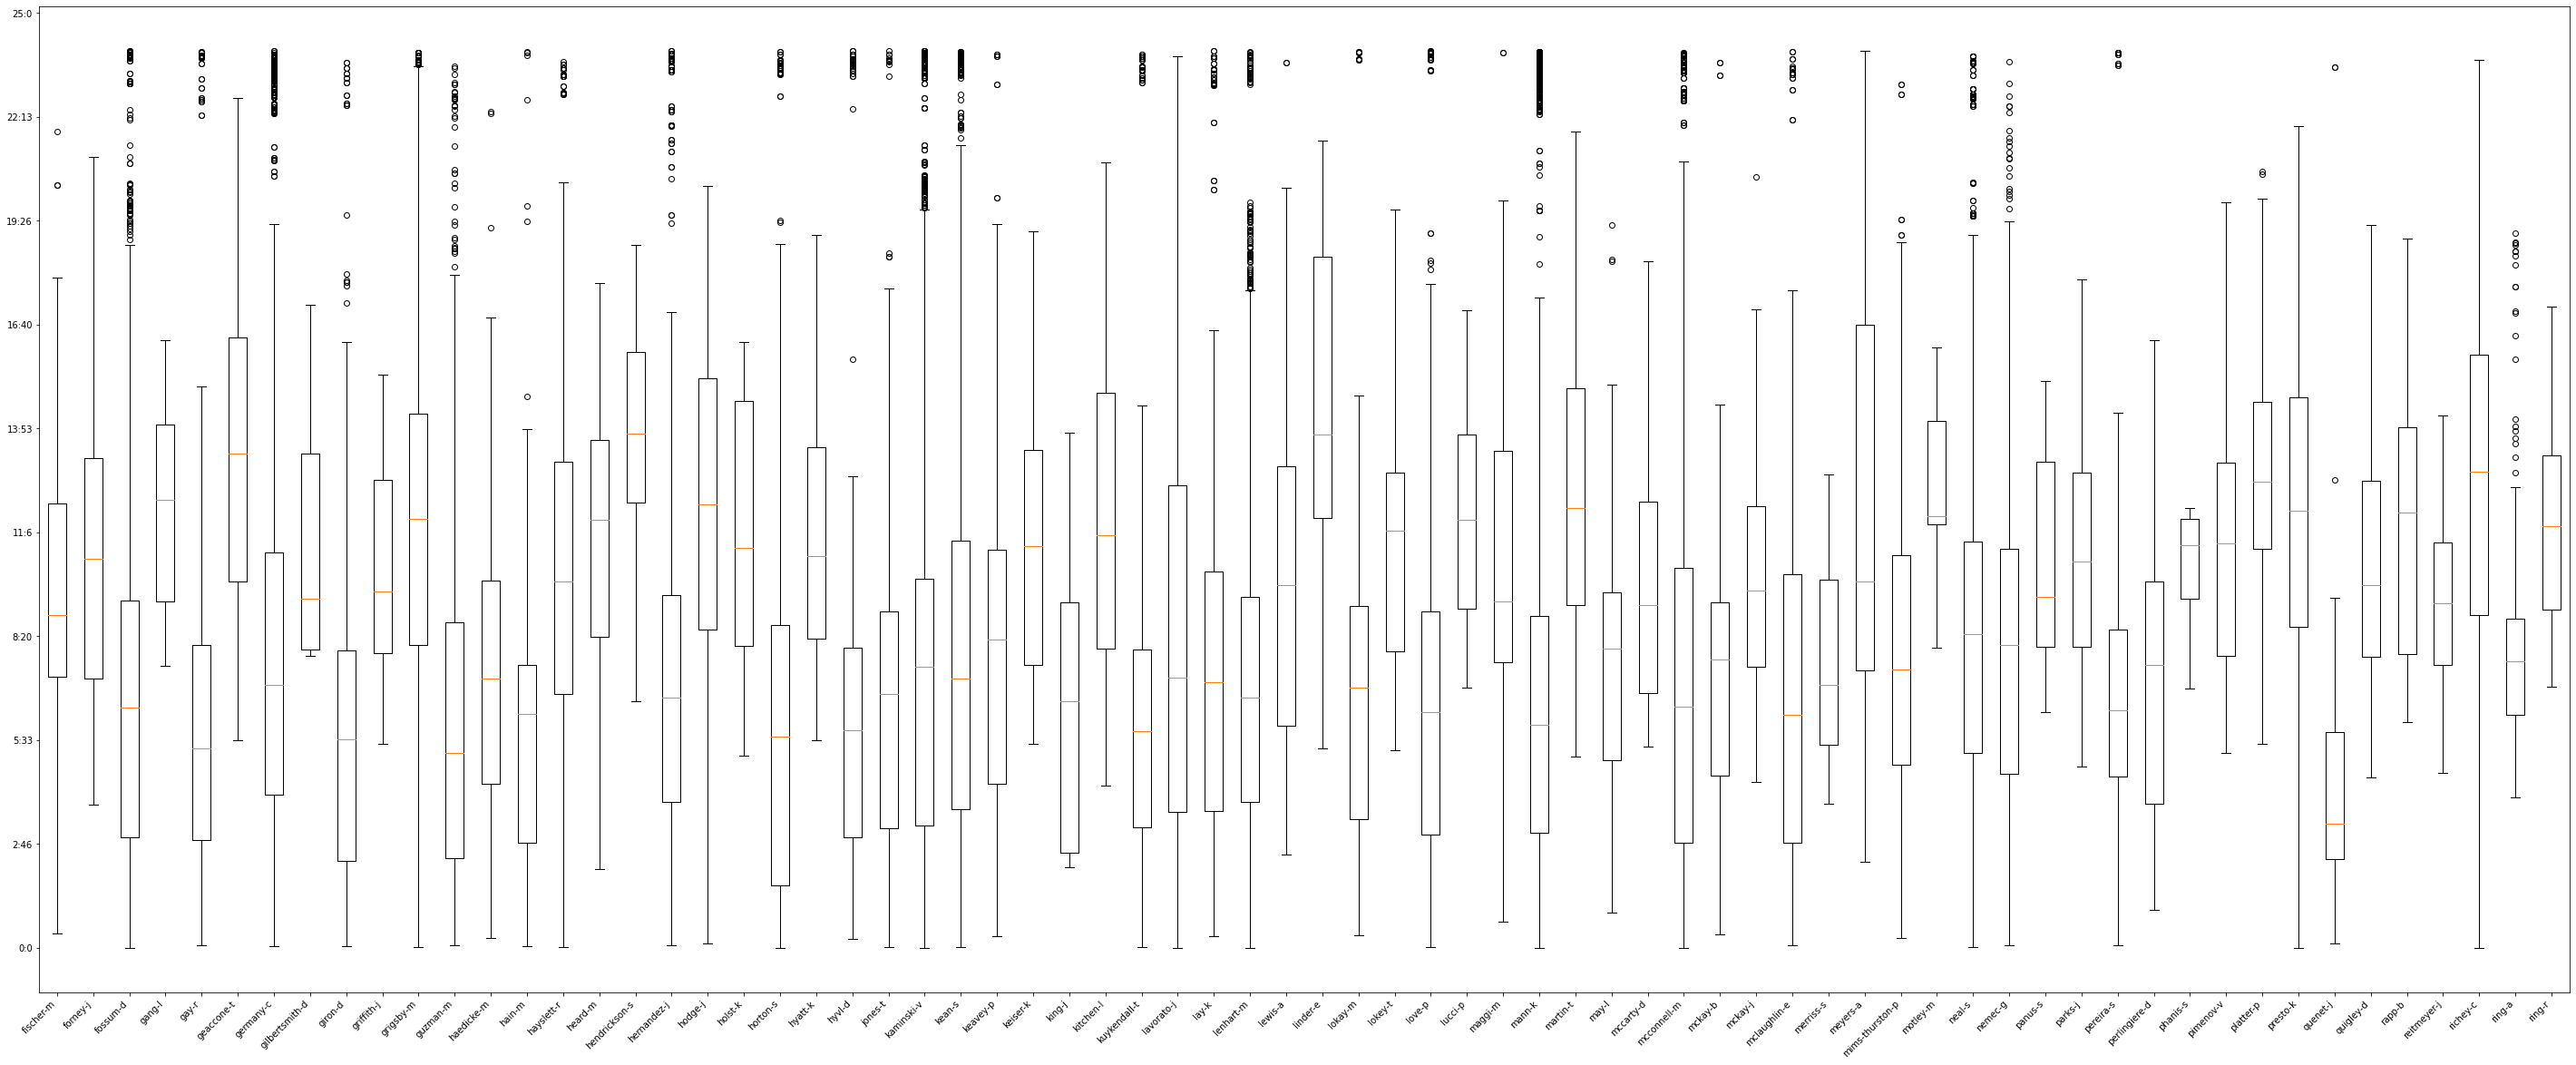

In [42]:
fig, axs = plt.subplots(1, 1, figsize=(50, 20))
m = 30
n = 100
axs.boxplot(times[m:n], labels=names[m:n])

plt.locator_params(axis='y', nbins=6)

def seconds_in_time(x, pos):
    hours = x // 3600
    minutes = (x - (hours * 3600)) // 60
    return '%d:%d' % (hours, minutes)

formatter = FuncFormatter(seconds_in_time)

axs.yaxis.set_major_locator(MaxNLocator(10))
axs.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha="right")

plt.show()

In [28]:
df[df["name"].isin(["fischer-m", "forney-j", "fossum-d", "gang-l", "gay-r", "geaccone-t", "germany-c"])].groupby("name").first()

,date,parsed_date,time,day,tz,seconds_since_midnight
name,,,,,,
fischer-m,"Date: Thu, 27 Sep 2001 07:54:24 -0700 (PDT)\n",2001-09-27 07:54:24-07:00,07:54:24,2001-09-27,PDT,28464
forney-j,"Date: Thu, 24 May 2001 16:51:00 -0700 (PDT)\n",2001-05-24 16:51:00-07:00,16:51:00,2001-05-24,PDT,60660
fossum-d,"Date: Fri, 9 Mar 2001 19:57:00 -0800 (PST)\n",2001-03-09 19:57:00-08:00,19:57:00,2001-03-09,PST,71820
gang-l,"Date: Fri, 21 Jun 2002 08:37:02 -0700 (PDT)\n",2002-06-21 08:37:02-07:00,08:37:02,2002-06-21,PDT,31022
gay-r,"Date: Mon, 10 Dec 2001 12:38:19 -0800 (PST)\n",2001-12-10 12:38:19-08:00,12:38:19,2001-12-10,PST,45499
geaccone-t,"Date: Mon, 22 Oct 2001 07:47:35 -0700 (PDT)\n",2001-10-22 07:47:35-07:00,07:47:35,2001-10-22,PDT,28055
germany-c,"Date: Wed, 14 Nov 2001 08:48:54 -0800 (PST)\n",2001-11-14 08:48:54-08:00,08:48:54,2001-11-14,PST,31734


In [29]:
grouped_timezones = df.groupby("name")["tz"].apply(list).reset_index()
grouped_timezones

,name,tz
0,allen-p,"[PDT, PDT, PDT, PDT, PDT, PDT, PDT, PDT, PST, ..."
1,arnold-j,"[PDT, PST, PDT, PDT, PDT, PDT, PST, PDT, PDT, ..."
2,arora-h,"[PST, PST, PST, PST, PST, PST, PST, PDT, PST, ..."
3,badeer-r,"[PST, PST, PST, PST, PST, PST, PST, PDT, PDT, ..."
4,bailey-s,"[PST, PST, PST, PDT, PST, PST, PST, PST, PST, ..."
...,...,...
143,williams-w3,"[PDT, PST, PDT, PDT, PDT, PDT, PDT, PDT, PDT, ..."
144,wolfe-j,"[PDT, PST, PST, PST, PST, PDT, PDT, PDT, PDT, ..."
145,ybarbo-p,"[PST, PDT, PDT, PST, PDT, PST, PST, PDT, PST, ..."
146,zipper-a,"[PDT, PDT, PDT, PDT, PDT, PST, PDT, PDT, PST, ..."


There appears to be two groups of workers: one sending emails in the normal working hours and the other one sending emails earlier than the normal hours. This difference cannot be explained by the timezones PST/PDT since they only differ by one hour and additionally this difference is already inside the emails.

A possible explanation would be a second office at the east coast of the US. Such an office would always be three hours early in comparison with one in the PST timezone. If the PST times were given for such an office then it would appear that those workers started very early in the morning.